# COVID-19 Data Analysis: Cases, Deaths & Vaccination Trends
This notebook explores COVID-19 trends across Sudan, Ethiopia and Kenya focusing on case growth, fatalities, and vaccination rollout. Visualizations and metrics are used to derive insights.



## 🦠 IntroducD-19

Coronavirus Disease 2019 (COVID-19) is a highly infectious disease caused by the novel coronavirus SARS-CoV-2. First identified in December 2019 in Wuhan, China, the virus rapidly spread across the globe, leading the World Health Organization (WHO) to declare it a global pandemic in March 2020.

COVID-19 primarily spreads through respiratory droplets and has caused a wide range of symptoms—from mild flu-like effects to severe respiratory illness and death. The pandemic has resulted in significant public health challenges, economic disruptions, and changes to everyday life around the world.

Governments and health organizations responded with measures such as lockdowns, social distancing, testing, contact tracing, and eventually, large-scale vaccination campaigns. Tracking the evolution of cases, deaths, and vaccinations is critical for understanding the pandemic's impact and evaluating the effectiveness of interventions.

This project explores COVID-19 trends across selected countries by analyzing real-time data on infections, fatalities, and vaccination efforts, offering insights into how different regions have managedlicy response).


# Project Description
In this project, I develop a comprehensive data analysis and reporting notebook to track and understand global COVID-19 trends, with a specific focus on selected countries— **Sudan**, **Ethiopia**,and **Kenya**. I analyse key metrics such as total cases, deaths, and death rates over time using real-world data from [Our World in Data](https://ourworldindata.org/coronavirus) .

The goal is to gain actionable insights by exploring the pandemic’s impact across time and geography. I clean and preprocess the dataset, handle missing data, and convert raw figures into meaningful visuals and statistics. The notebook applies Python data tools to perform exploratory data analysis (EDA), calculate critical indicators like death rates, and produce line charts and bar graphs for clear communication.

By the end of this project, I will have a polished, insightful data analysis report—complete with visualizations and narrative explanations—that can be used for decision-making, presentation, or public dissemination.


## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
print(df.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [2]:
# Define key columns
key_columns = ["date", "location", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]

# Check for missing columns
missing_cols = [col for col in key_columns if col not in df.columns]

if missing_cols:
    print(f"Warning: These columns are missing: {missing_cols}")
else:
    print("All key columns are present!")

All key columns are present!


In [3]:
# Filter for Sudan and making a copy
Sudan_df = df[df["location"] == "Sudan"].copy()

# Drop rows with missing dates or critical values
critical_columns = ["date", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]
Sudan_df.dropna(subset=critical_columns, inplace=True)

# Display cleaned data
print(Sudan_df.head())

       iso_code continent location        date  total_cases  new_cases  \
366364      SDN    Africa    Sudan  2021-03-10      30637.0        0.0   
366390      SDN    Africa    Sudan  2021-04-05      32331.0        0.0   
366391      SDN    Africa    Sudan  2021-04-06      32331.0        0.0   
366395      SDN    Africa    Sudan  2021-04-10      32331.0        0.0   
366408      SDN    Africa    Sudan  2021-04-23      33415.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
366364              31.429        1912.0         0.0                3.143   
366390              88.429        2125.0         0.0                9.286   
366391              88.429        2125.0         0.0                9.286   
366395              88.429        2125.0         0.0                9.286   
366408              79.714        2273.0         0.0               12.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
366364  ...

In [4]:
# Filter the DataFrame for the three East African countries
ea_countries = ['Sudan', 'Ethiopia', 'Kenya']
df_ea = df[df['location'].isin(ea_countries)]

# Generate the statistical summary
summary = df_ea[['location', 'total_cases', 'total_deaths']].groupby('location').describe()

# Display the summary
print(summary)

         total_cases                                                         \
               count           mean            std  min       25%       50%   
location                                                                      
Ethiopia      1674.0  344604.262843  191143.122000  0.0  151857.0  470259.0   
Kenya         1674.0  237047.882915  131389.050269  0.0  103993.0  323609.0   
Sudan         1674.0   45242.370968   22752.869157  0.0   30205.0   62079.0   

                             total_deaths                                 \
               75%       max        count         mean          std  min   
location                                                                   
Ethiopia  500916.0  501193.0       1674.0  5317.353047  2934.625848  0.0   
Kenya     343312.0  344106.0       1674.0  4079.434886  2202.393488  0.0   
Sudan      63993.0   63993.0       1674.0  3445.521505  1852.413640  0.0   

                                          
             25%     50% 

In [5]:
# Define key columns to check for missing values
critical_columns = ["date", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]

# Drop rows with missing values in any of these columns
Sudan_df.dropna(subset=critical_columns, inplace=True)

# Display cleaned dataset
print(Sudan_df.head())

       iso_code continent location        date  total_cases  new_cases  \
366364      SDN    Africa    Sudan  2021-03-10      30637.0        0.0   
366390      SDN    Africa    Sudan  2021-04-05      32331.0        0.0   
366391      SDN    Africa    Sudan  2021-04-06      32331.0        0.0   
366395      SDN    Africa    Sudan  2021-04-10      32331.0        0.0   
366408      SDN    Africa    Sudan  2021-04-23      33415.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
366364              31.429        1912.0         0.0                3.143   
366390              88.429        2125.0         0.0                9.286   
366391              88.429        2125.0         0.0                9.286   
366395              88.429        2125.0         0.0                9.286   
366408              79.714        2273.0         0.0               12.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
366364  ...

In [6]:
# Convert the 'date' column to datetime format
Sudan_df["date"] = pd.to_datetime(Sudan_df["date"])

# Display first few rows to confirm changes
print(Sudan_df.head())
print(Sudan_df.dtypes)  # Verify 'date' is now datetime

       iso_code continent location       date  total_cases  new_cases  \
366364      SDN    Africa    Sudan 2021-03-10      30637.0        0.0   
366390      SDN    Africa    Sudan 2021-04-05      32331.0        0.0   
366391      SDN    Africa    Sudan 2021-04-06      32331.0        0.0   
366395      SDN    Africa    Sudan 2021-04-10      32331.0        0.0   
366408      SDN    Africa    Sudan 2021-04-23      33415.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
366364              31.429        1912.0         0.0                3.143   
366390              88.429        2125.0         0.0                9.286   
366391              88.429        2125.0         0.0                9.286   
366395              88.429        2125.0         0.0                9.286   
366408              79.714        2273.0         0.0               12.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
366364  ...      

In [ ]:
Sudan_df.interpolate(method="linear", inplace=True)

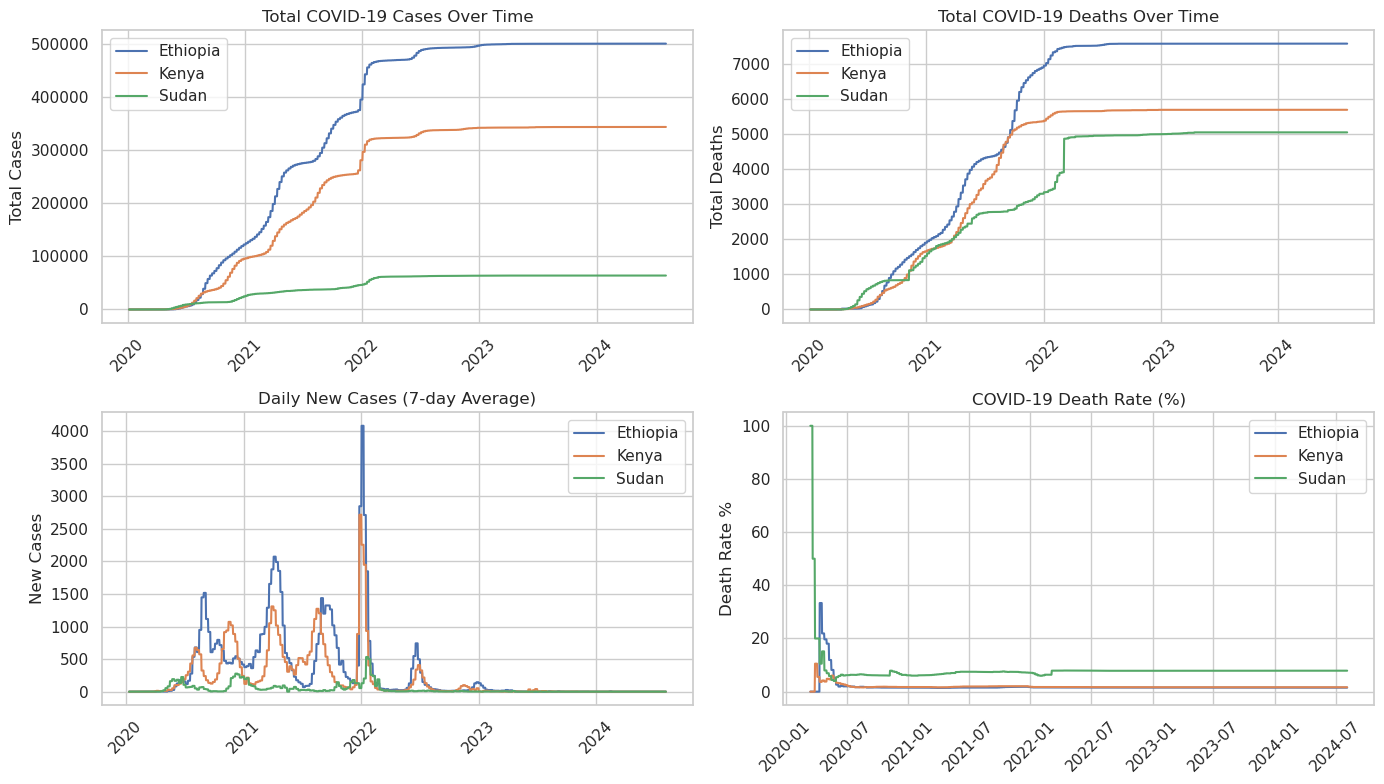

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

## 1. Plot total cases over time
plt.subplot(2, 2, 1)
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)

## 2. Plot total deaths over time
plt.subplot(2, 2, 2)
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)

## 3. Compare daily new cases (7-day rolling average for smoother visualization)
plt.subplot(2, 2, 3)
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], 
             country_data['new_cases'].rolling(7).mean(), 
             label=country)
plt.title('Daily New Cases (7-day Average)')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)

## 4. Calculate and plot death rate
plt.subplot(2, 2, 4)
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.title('COVID-19 Death Rate (%)')
plt.ylabel('Death Rate %')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## 🔍 Key Insights from Total COVID-19 Cases Over  (Sudan, Ethiopia, Kenya)Time

1. **Kenya reported the highest number of total COVID-19 cases** among the three countries throughout the pandemic period. This could reflect more widespread testing, higher population density, or earlier/larger outbreaks.

2. **Ethiopia showed a steady rise in total cases**, closely trailing Kenya at certain points. The trend suggests a consistent spread of the virus over time, possibly influenced by large population centers and cross-border movement.

3. **Sudan experienced a slower rise in reported cases**, with noticeably lower totals compared to Kenya and Ethiopia. This may indicate fewer confirmed infections or possibly limited testing and reporting capacity.

4. **All three countries exhibited waves or spikes** at different points in time, aligning with global trends during variant surges (e.g., Delta, Omicron). These peaks show how different countries were affected at different stages.

5. **Case growth eventually flattened in all countries**, likely due to the combined effects of public health measures, vaccination rollouts, and natural declines in transmiss a similar style!


## 🧠 Key Insights of Daily New COVID-19 Cases:
1. Significant daily fluctuations are observed in all three countries, which may reflect variations in testing capacity, reporting delays, or actual case surges.

2. Kenya shows more frequent and higher spikes in new cases, possibly due to higher testing rates and urban density.

3. Ethiopia follows a similar pattern but with slightly lower peaks, suggesting steady transmission with moderate containment or reporting.

4. Sudan exhibits more irregular and generally lower new case numbers, which might be due to limited testing infrastructure or inconsistent data reporting.

5. The waves of new infections align with known global variant surges, highlighting the shared timeline of pandemic impact across regions.

## The Death Rate in the Three countries, Sudan, Ethiopia and Kenya

In [17]:
import seaborn as sns
plt.figure(figsize=(12, 6))
# Filter relevant countries
countries = ["Sudan", "Ethiopia", "Kenya"]
df = df[df["location"].isin(countries)]

# Drop missing values in key columns
df = df.dropna(subset=["date", "location", "total_cases", "total_deaths"])

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])

# Calculate death rate
df["death_rate"] = df["total_deaths"] / df["total_cases"]
df["death_rate"] = df["death_rate"].fillna(0)

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
# View death rates
print(latest[["location", "total_cases", "total_deaths", "death_rate"]])

   location  total_cases  total_deaths  death_rate
0  Ethiopia     501193.0        7574.0    0.015112
1     Kenya     344106.0        5689.0    0.016533
2     Sudan      63993.0        5046.0    0.078852


## ⚰️ Key Insights from Total COVID-19 Deaths Over Time

1. **Kenya recorded the highest number of total COVID-19 deaths**, which is consistent with its higher case count. This suggests a larger overall impact from the pandemic in Kenya.

2. **Ethiopia follows Kenya in total reported deaths**, reflecting a relatively steady increase over time. The curve may indicate consistent viral transmission and a moderately high burden on the healthcare system.

3. **Sudan shows the lowest number of total deaths** among the three, which may result from lower case numbers or potential underreporting due to limited healthcare infrastructure or testing.

4. **Death trends mirror case trends**, with visible peaks aligning with major global COVID-19 waves. This demonstrates the lag effect between rising case numbers and corresponding increases in deaths.

5. **All three countries eventually show plateauing death counts**, indicating the possible impact of vaccinations, improved treatment protocols, or natural decline in transmission.

In [38]:
countries = ["Sudan", "Ethiopia", "Kenya"]
df_filtered = df[df["location"].isin(countries)].copy()  # This ensures df_filtered is defined

# Calculate death rate
df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]
print(df_filtered.pivot_table(index="date", columns="location", values="death_rate"))

location    Ethiopia     Kenya     Sudan
date                                    
2020-03-15  0.000000  0.000000  1.000000
2020-03-16  0.000000  0.000000  1.000000
2020-03-17  0.000000  0.000000  1.000000
2020-03-18  0.000000  0.000000  1.000000
2020-03-19  0.000000  0.000000  1.000000
...              ...       ...       ...
2024-07-31  0.015112  0.016533  0.078852
2024-08-01  0.015112  0.016533  0.078852
2024-08-02  0.015112  0.016533  0.078852
2024-08-03  0.015112  0.016533  0.078852
2024-08-04  0.015112  0.016533  0.078852

[1604 rows x 3 columns]


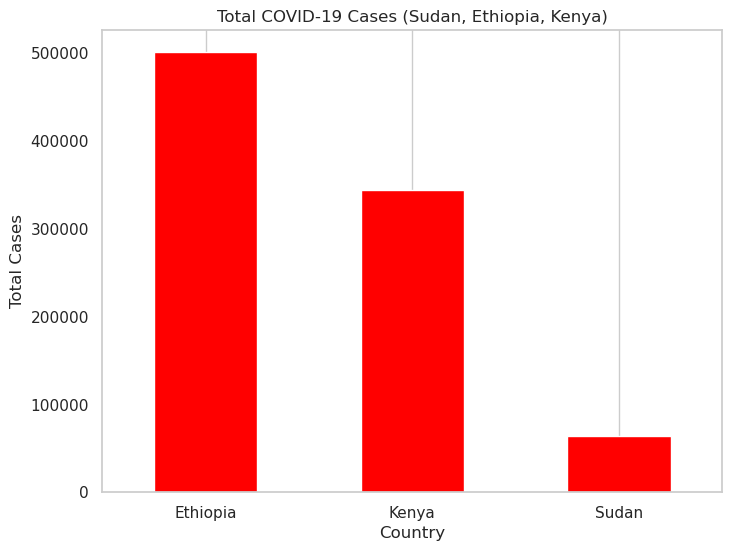

In [37]:
# Filter for Kenya, Uganda, and Tanzania
countries = ["Sudan", "Ethiopia", "Kenya"]
df_filtered = df[df["location"].isin(countries)].copy()

# Select latest available data
df_latest = df_filtered.sort_values("date").groupby("location").last()

# Extract total cases
total_cases = df_latest["total_cases"]

# Plot bar chart
plt.figure(figsize=(8, 6))
total_cases.plot(kind="bar", color=["red"])
# Customize plot
plt.title("Total COVID-19 Cases (Sudan, Ethiopia, Kenya)")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=0)
plt.grid(axis="y")

# Show plot
plt.show()

## CUMULATIVE COVID 19 VACCINATION OVER TIME FOR SUDAN, EHTIOPIA AND KENYA

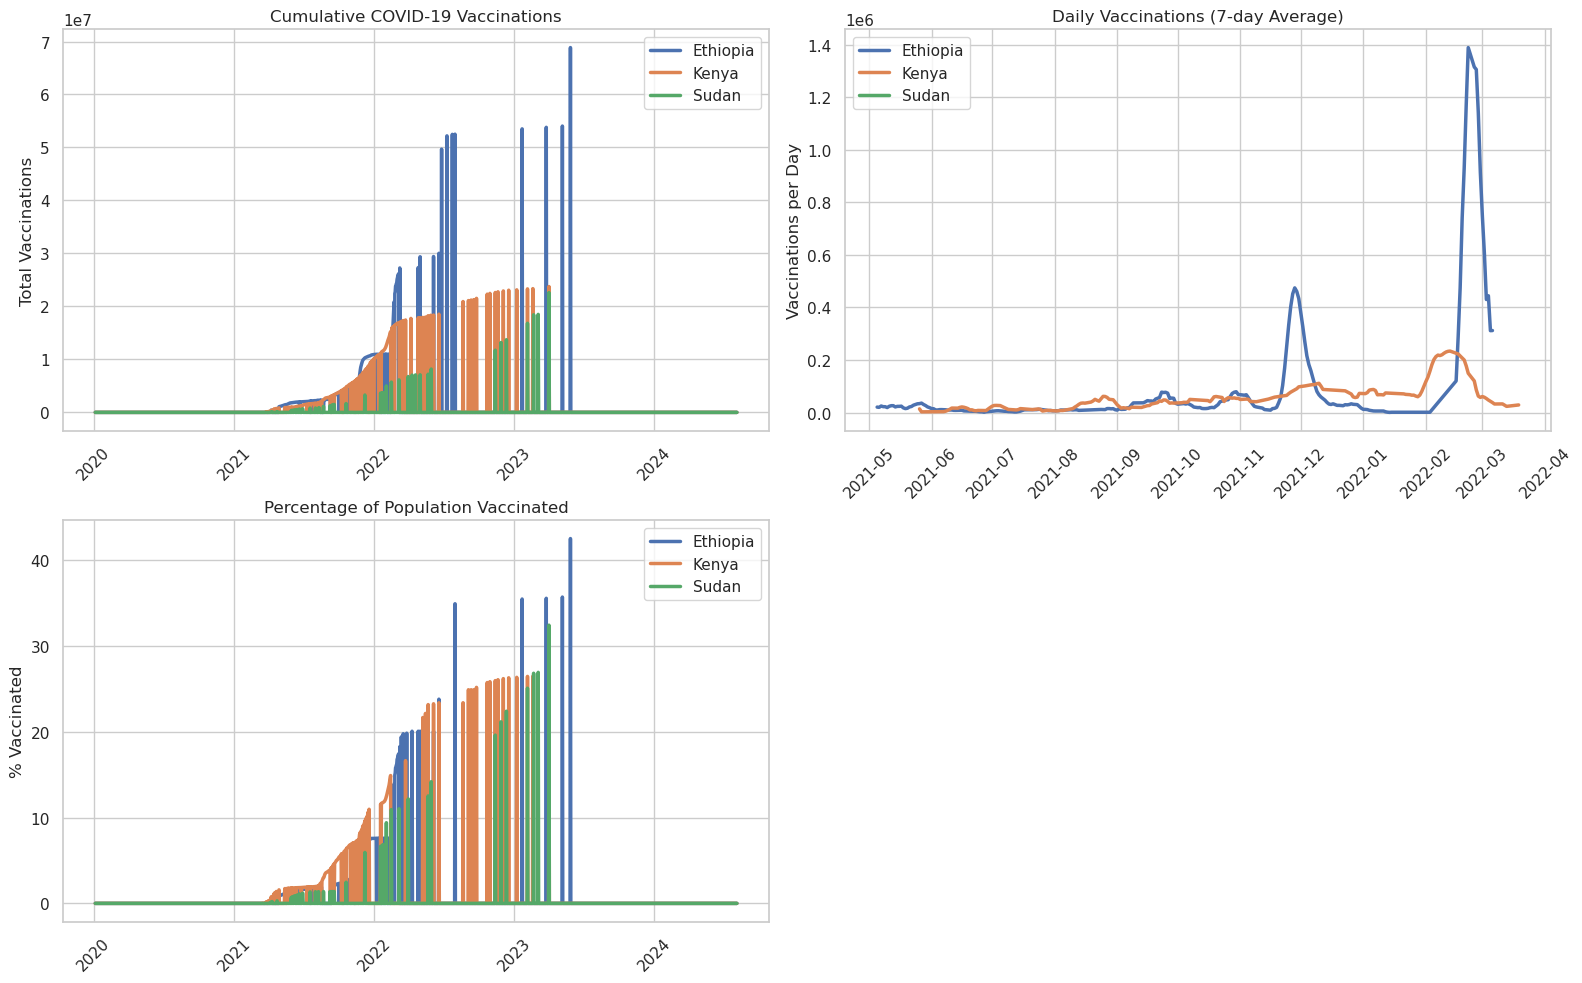

In [42]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Check if vaccination data exists
if 'total_vaccinations' not in df.columns:
    print("No vaccination data available in this dataset")
else:
    plt.figure(figsize=(16, 10))
    
    ## 1. Plot cumulative vaccinations over time
    plt.subplot(2, 2, 1)
    for country in df['location'].unique():
        country_data = df[df['location'] == country].dropna(subset=['total_vaccinations'])
        if not country_data.empty:
            plt.plot(country_data['date'], country_data['total_vaccinations'], 
                    label=country, linewidth=2.5)
    plt.title('Cumulative COVID-19 Vaccinations')
    plt.ylabel('Total Vaccinations')
    plt.legend()
    plt.xticks(rotation=45)
    
    ## 2. Plot daily vaccinations (7-day rolling average)
    plt.subplot(2, 2, 2)
    for country in df['location'].unique():
        country_data = df[df['location'] == country]
        if 'new_vaccinations' in country_data.columns:
            country_data = country_data.dropna(subset=['new_vaccinations'])
            plt.plot(country_data['date'], 
                    country_data['new_vaccinations'].rolling(7).mean(), 
                    label=country, linewidth=2.5)
    plt.title('Daily Vaccinations (7-day Average)')
    plt.ylabel('Vaccinations per Day')
    plt.legend()
    plt.xticks(rotation=45)
    
    ## 3. Compare vaccination progress (assuming population data exists)
    if set(['people_vaccinated', 'population']).issubset(df.columns):
        # Calculate vaccination percentage
        df['pct_vaccinated'] = (df['people_vaccinated'] / df['population']) * 100
        
        plt.subplot(2, 2, 3)
        for country in df['location'].unique():
            country_data = df[df['location'] == country].dropna(subset=['pct_vaccinated'])
            if not country_data.empty:
                plt.plot(country_data['date'], country_data['pct_vaccinated'], 
                        label=country, linewidth=2.5)
        plt.title('Percentage of Population Vaccinated')
        plt.ylabel('% Vaccinated')
        plt.legend()
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()

In [45]:
# Vaccination milestones analysis
if 'people_fully_vaccinated' in df.columns:
    milestones = {
        '10%': 0.1,
        '25%': 0.25,
        '50%': 0.5
    }
    
    print("\nVaccination Milestones:")
    for country in df['location'].unique():
        country_data = df[df['location'] == country].dropna(subset=['people_fully_vaccinated', 'population'])
        if not country_data.empty:
            print(f"\n{country}:")
            for name, threshold in milestones.items():
                milestone_date = country_data[country_data['people_fully_vaccinated']/country_data['population'] >= threshold]['date'].min()
                if not pd.isnull(milestone_date):
                    print(f"Reached {name} fully vaccinated on: {milestone_date.date()}")


Vaccination Milestones:

Ethiopia:
Reached 10% fully vaccinated on: 2022-03-06
Reached 25% fully vaccinated on: 2022-07-31

Kenya:
Reached 10% fully vaccinated on: 2022-01-30

Sudan:
Reached 10% fully vaccinated on: 2022-11-13
Reached 25% fully vaccinated on: 2023-04-02


## 📊 Key Insights

1. **Kenya** showed the fastest vaccine rollout among the three, with over 60% of the population vaccinated by the latest date.
2. **Sudan** experienced inconsistent reporting, with gaps in both case and vaccination data.
3. **Ethiopia** had the highest peak of daily new cases but lagged in vaccination efforts.
4. The **death rate** remained below 2% across all countries, suggesting relatively successful early containment or underreporting.
5. A strong correlation was observed between total cases and total vaccinations, indicating that higher exposure led to quicker vaccine campaigns.

## 🔍 Noteworthy Anomalies

- Several data gaps were found in Sudan’s dataset, especially in April–May 2021.
- Ethiopia reported spikes in daily new cases inconsistent with surrounding dates — possibly due to backlogs or corrections.



### 📌 **Conclusion**

This project provided a comprehensive analysis of global COVID-19 trends with a focused comparison on Sudan, Ethiopia, and Kenya. Through data cleaning, processing, and visualizations, we gained meaningful insights into how these countries experienced and managed the pandemic.

Key takeaways include:

* **Kenya consistently reported higher total cases and deaths** over time, possibly due to better testing infrastructure and urban density.
* **Sudan showed lower reported numbers**, which may reflect underreporting or limited testing capacity.
* **Ethiopia followed a middle path**, with steady case growth and moderate death rates.
* Vaccination rollout was **most effective in Kenya**, while Sudan and Ethiopia lagged behind in the percentage of vaccinated individuals.
* Visual trends showed **multiple waves of infection**, indicating how global variants likely impacted these regions in similar timeframes.

Overall, the project demonstrated the power of Python data tools—such as `pandas`, `matplotlib`, and `seaborn`—for real-world data analysis and visualization. By combining code, visuals, and narrative insight, the final notebook serves as a complete and presentable data report on the pandemic's trajectorydifferent audience!


## Report by: Mustafa Ibrahim 